## Problem 1a: 
## Periodic spinodal decomposition on a square domain

Necessary imports for graphing and PDE solving:

In [139]:
%matplotlib inline
import fipy as fp
import numpy as np
import matplotlib.pyplot as plt

The square domain of the problem has dimensions 20 units by 20 units, with cells that are half a unit long on each side. A PeriodicGrid2D object is used because the domain's boundary conditions are periodic.

In [130]:
mesh = fp.PeriodicGrid2D(nx=40, ny=40, dx=0.5, dy=0.5)

Constants and initial conditions:
$c_{\alpha}, c_{\beta},$ and $c_m = \frac{(c_{\alpha} + c_{\beta})}{2}$ are concentrations at which the bulk free energy has minima.
$\kappa$ is the gradient energy coefficient.

In [131]:
c_alpha = 0.05
c_beta = 0.95
c_m = (c_alpha + c_beta) / 2.
# control on height of double-well barrier
A = 2.0
kappa = 2.0

B = A / (c_alpha - c_m)**2
D = D_alpha = D_beta = 2. / (c_beta - c_alpha)

# initial conditions
c_0 = 0.45
q = np.sqrt((2., 3.))
epsilon = 0.01

$c_{var}$ is a cell variable specifying concentrations at various points in the mesh. Here, it is the solution variable:

$c_{var}\left(\vec{r}, t\right)$ such that

$$ c_{var}\left(\vec{r}, 0\right) = \bar{c}_0 + \epsilon \cos \left( \vec{q} \cdot \vec{r} \right) $$

In [132]:
# array of sample c-values: used in f versus c plot
vals = np.linspace(-.1, 1.1, 1000)

c_var = fp.CellVariable(mesh=mesh, name=r"$c$", hasOld=True)
r = np.array((mesh.x, mesh.y))
c_var[:] = c_0 + epsilon * np.cos((q[:, None] * r).sum(0))
# viewer = fp.Viewer(c_var, limits = {'ymin': 0, 'ymax': 20},
#                     datamin=.440, datamax =.460,
#                     title = "Matplot2DViewer test")

The equation for the bulk free energy density (alternatively called the chemical free energy density) of this system is expressed as 
$$ \int\limits_V{\!\Big(f_{chem}+\frac{\kappa}{2}{\big|\nabla c\big|}^2}\Big)\,\mathrm{d}V.$$ Also, $f_{chem}$ or $f_0$ in this problem has a simple polynomial form, $$ f_0  = -\frac{A}{2}(c-c_m)^2 +\frac{B}{4}(c-c_m)^4 + \frac{c_{\alpha}}{4}(c-c_{\alpha})^4 + \frac{c_{\beta}}{4}(c-c_{\beta})^4.$$

In [133]:
(np.array(c_var))
print(c_var.grad)


[[ 0.01073054 -0.01295412 -0.01049862 ...,  0.01116697  0.01280422
  -0.01169724]
 [ 0.00918288  0.00048035 -0.00845251 ...,  0.00742378 -0.00174462
  -0.01007646]]


In [142]:
# bulk free energy density
def f_0(c):
    return - A / 2 * (c - c_m)**2 + B / 4 * (c - c_m)**4+ c_alpha / 4 * (c - c_alpha)**4 + c_beta / 4 * (c - c_beta)**4
def f_0_var(c_var):
    return -A + 3*B*(c_var - c_m)**2 + 3*c_alpha*(c_var - c_alpha)**2 + 3*c_beta*(c_var - c_beta)**2
# free energy
def f(c):
    return (f_0(c)+ .5*kappa*(c.grad.mag)**2)

# plot free energy density versus c
def plotf_c():
    plt.figure(1)
    plt.xlabel('c')
    plt.ylabel('f_0')
    plt.plot(vals, f_0(vals))
    plt.show()

Here, the elapsed time and total free energy at each time step are saved to separate lists. These lists are then updated in a text file.

In [90]:
# save elapsed time and free energy at each data point
f_data = []
time_data = []

def save_data(f, time):
    f_data.append(f.value)
    time_data.append(time)
    np.savetxt('1bfree_energy.txt', zip(time_data, f_data))

The solver equation is now defined.

In [91]:
# start solver
eqn = fp.TransientTerm(coeff=1.) == fp.DiffusionTerm(D * f_0_var(c_var)) - fp.DiffusionTerm((D, kappa))

A time stepping scheme is used to solve the equation. If the residual increases, the solver backtracks; if the specified tolerance is not reached, the time step is recalculated.

In [100]:
elapsed = 0.0
steps = 0
dt = 0.01
total_sweeps = 2
tolerance = 1e-1
total_steps = 1000

In [101]:
c_var.updateOld()
from fipy.solvers.pysparse import LinearLUSolver as Solver
solver = Solver()

Initialize an empty list for generated viewers:

In [102]:
viewers = []

10
0.15937424601
20
0.572749994933
30
1.64494022689
40
3.95711058844
50
6.23943120968
60
8.2224465441
70
10.0673718795
80
11.7052442291
90
13.2613489642
100
14.8075637629
110
16.3446408801
120
17.8713635156
130
19.4223343475
140
20.9633047035
150
22.42787604
160
23.915708454
170
25.4273798535
180
26.9634746137
190
28.456089317
200
29.9724104969
210
31.4789546177


/users/and9/miniconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


220
32.9765477599
230
34.4639004591
240
35.9418001803
250
37.4435776292
260
38.9028463927
270
40.4186786723
280
41.9248769699
290
43.455410202
300
44.9767237034
310
46.5215808856
320
48.0916118989
330
49.6863648357
340
51.3075475661
350
52.9547338009
360
54.6274117092
370
56.4044595532
380
58.2104648326
390
60.1291592638
400
62.2145076247
410
64.4284888808
420
66.4882965083
430
68.0924315976
440
69.546603945
450
70.8971050788
460
72.1806503742
470
73.4845815979
480
74.7801052279
490
76.067931636
500
77.3469519721
510
78.6758506526
520
79.9961807521
530
81.3086662445
540
82.6121770479
550
83.9074032938
560
85.2235558983
570
86.5024540368
580
87.8016642952
590
89.0924974
600
90.3756611512
610
91.6500507133
620
92.9163408002
630
94.2030897379
640
95.4534164974
650
96.7236015914
660
97.9855966827
670
99.2685067816
680
100.542774589
690
101.837280974
700
103.123440536
710
104.401958512
720
105.671734066
730
106.93343947
740
108.215529651
750
109.461329524
760
110.726915833
770
111.984341791

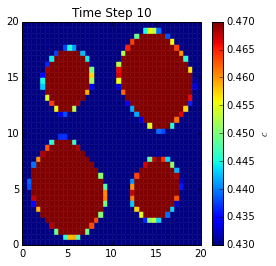

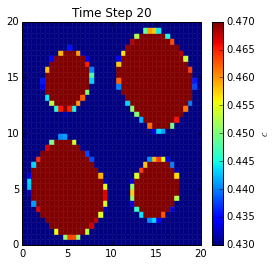

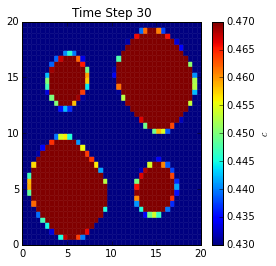

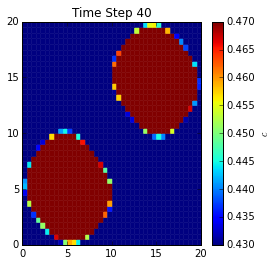

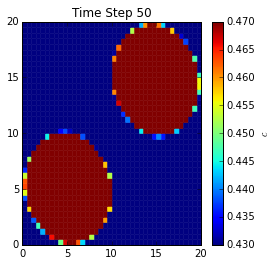

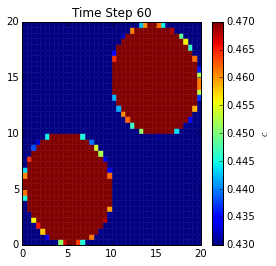

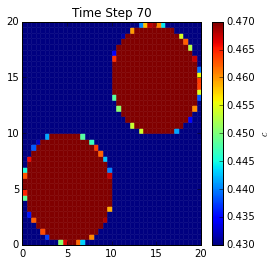

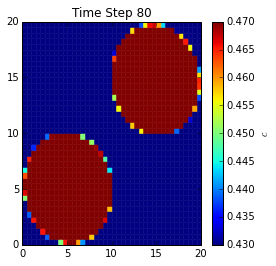

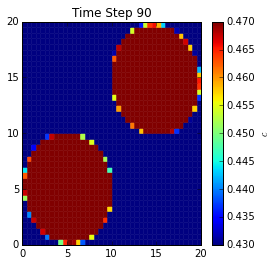

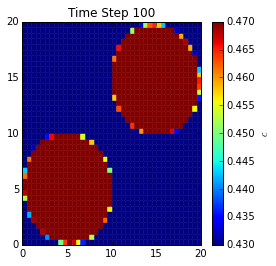

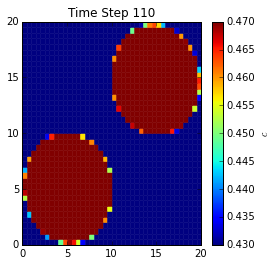

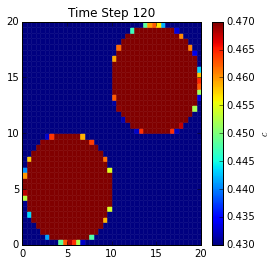

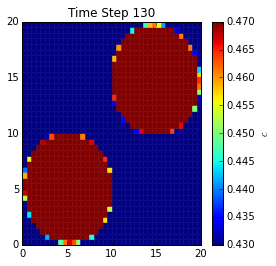

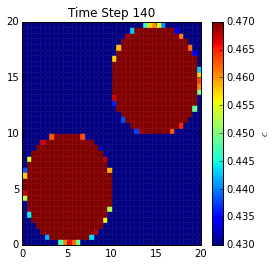

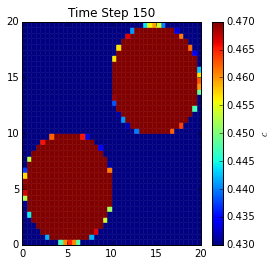

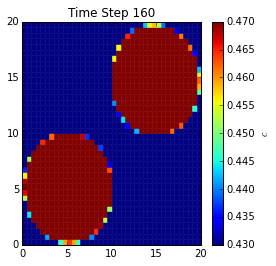

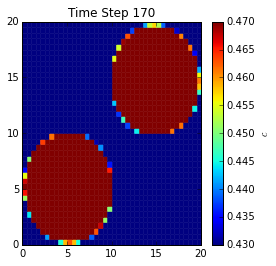

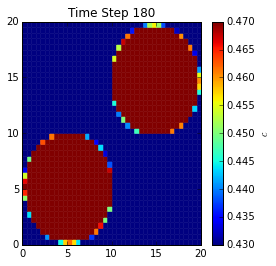

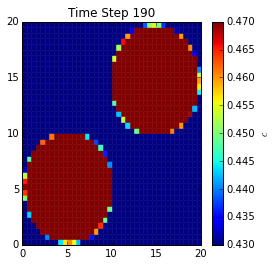

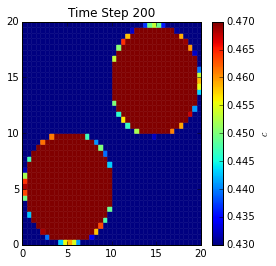

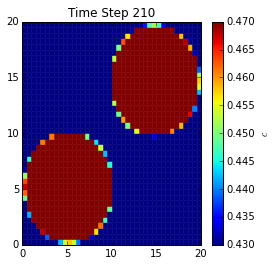

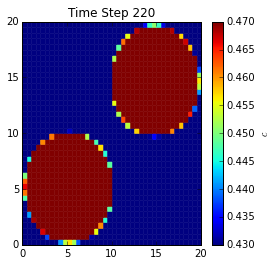

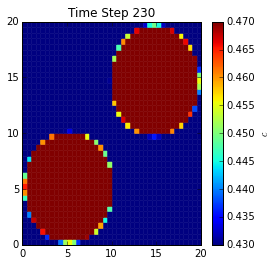

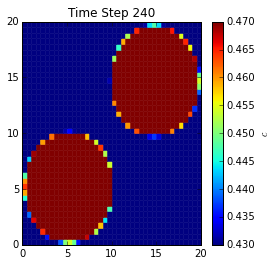

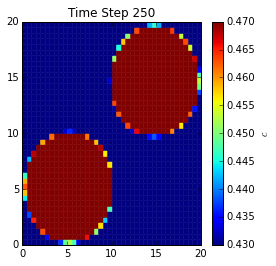

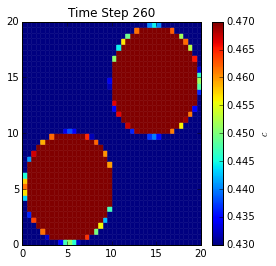

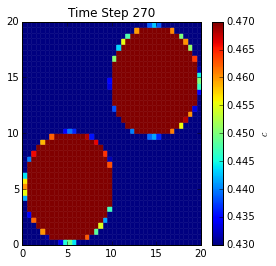

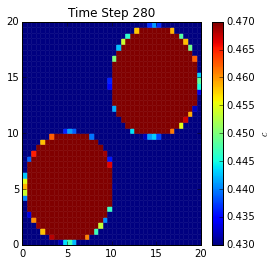

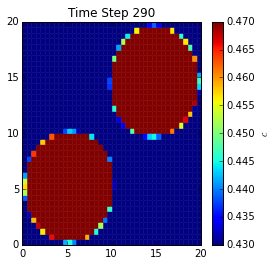

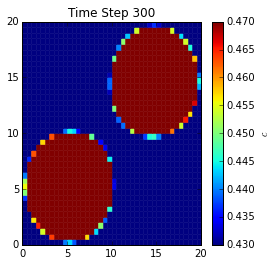

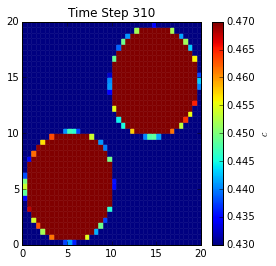

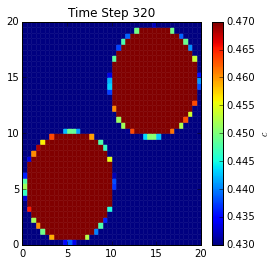

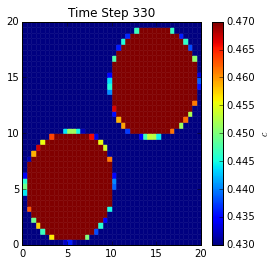

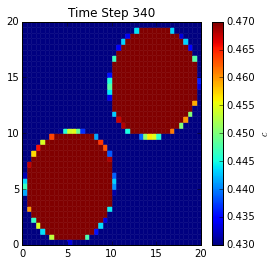

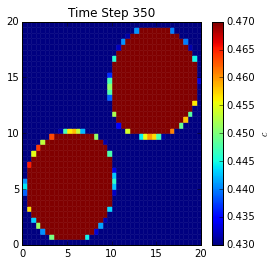

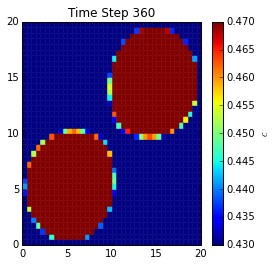

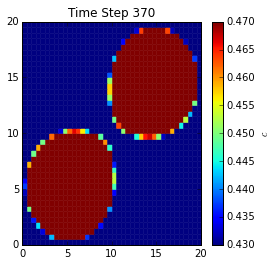

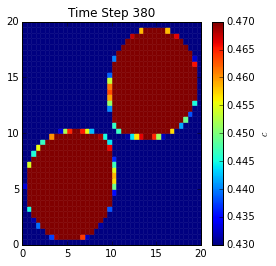

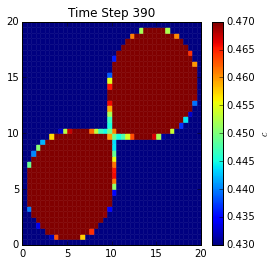

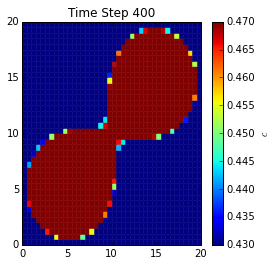

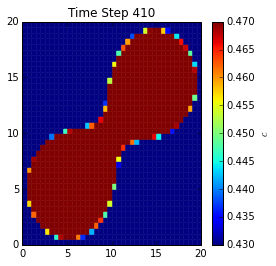

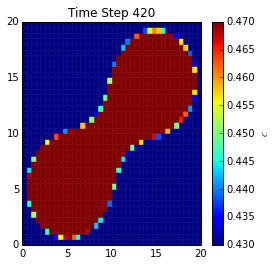

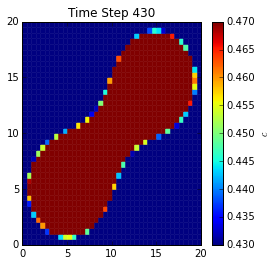

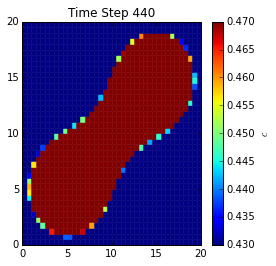

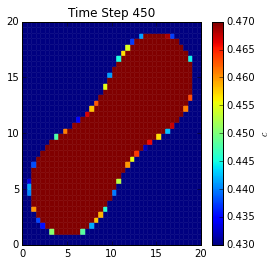

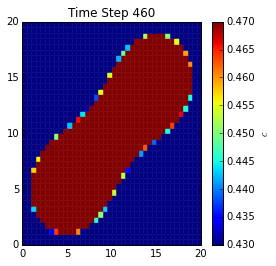

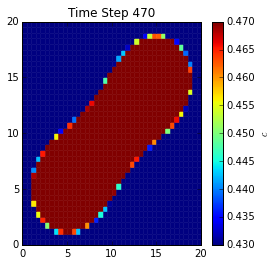

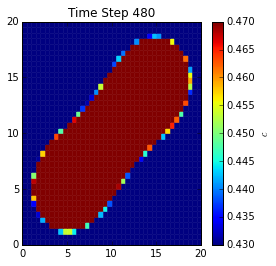

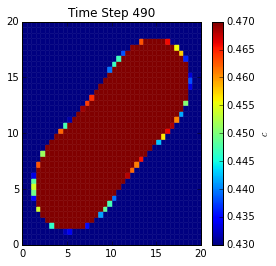

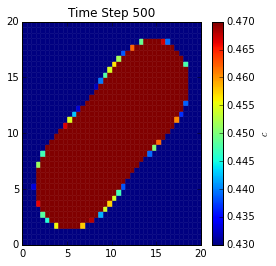

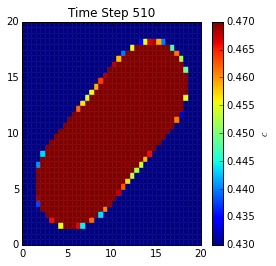

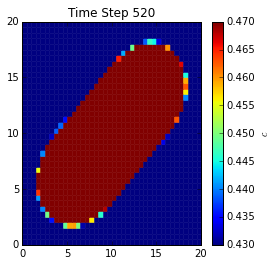

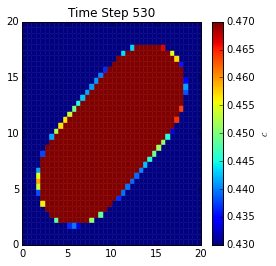

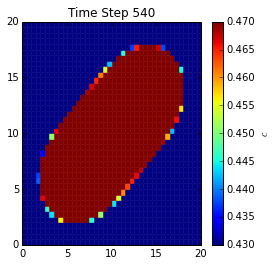

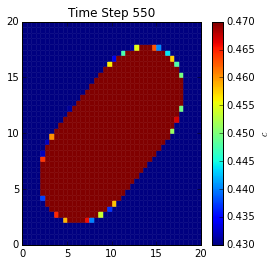

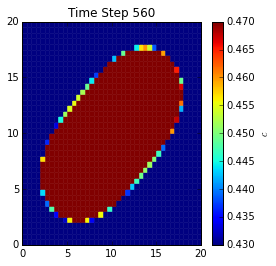

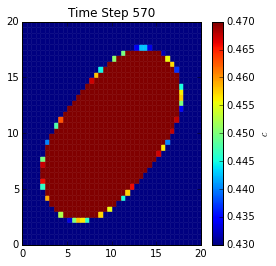

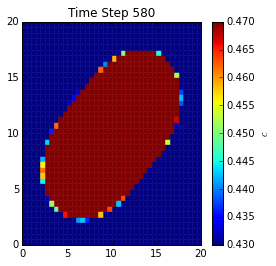

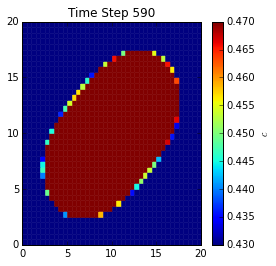

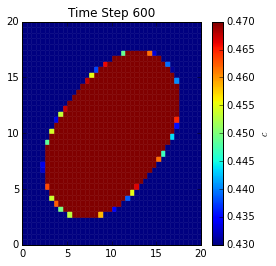

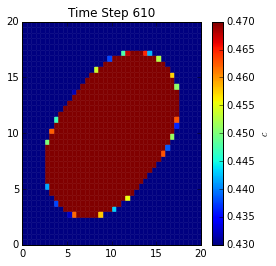

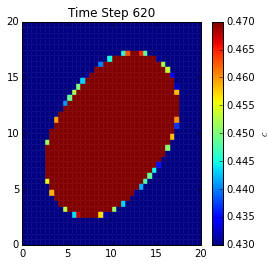

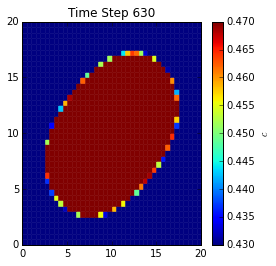

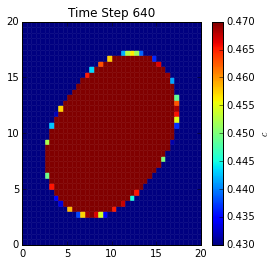

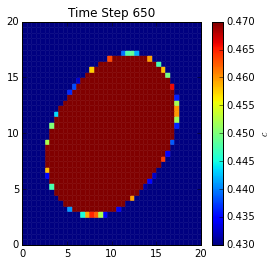

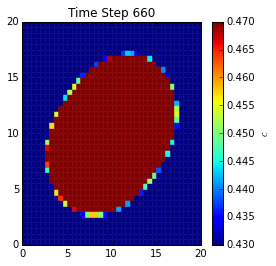

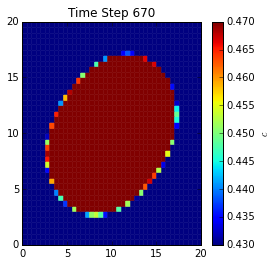

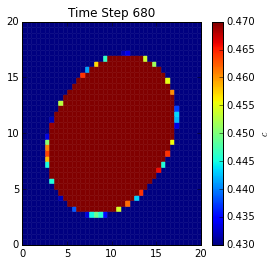

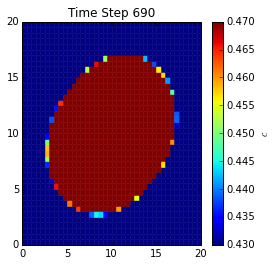

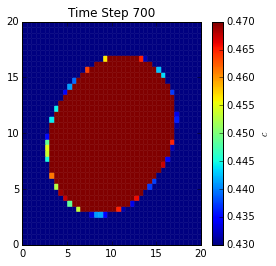

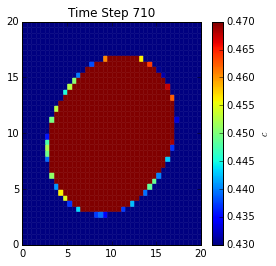

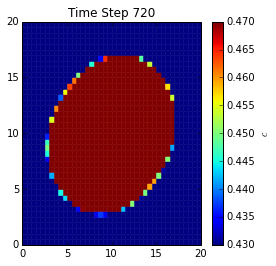

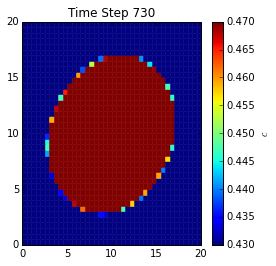

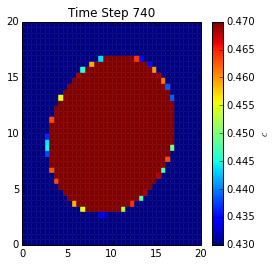

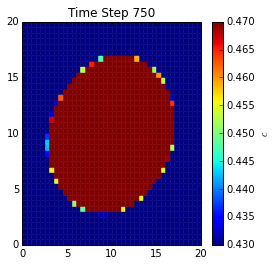

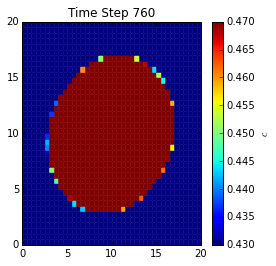

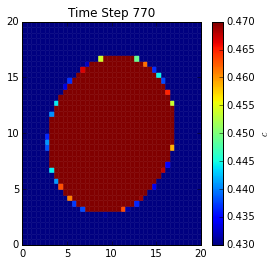

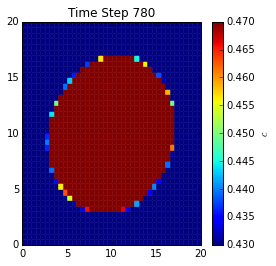

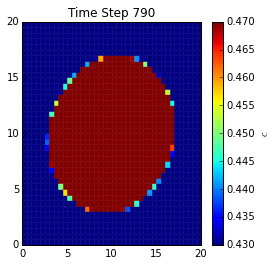

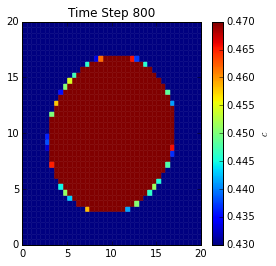

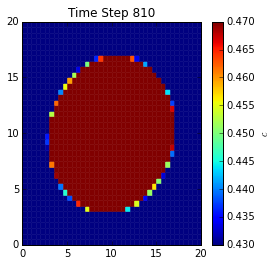

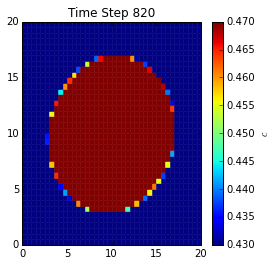

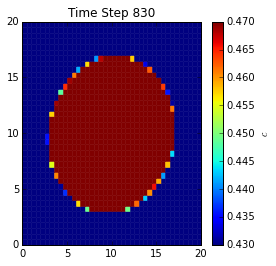

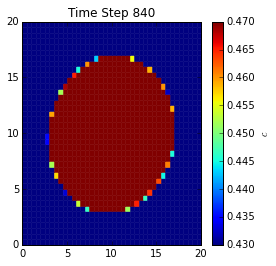

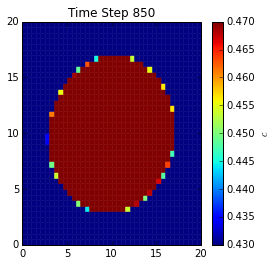

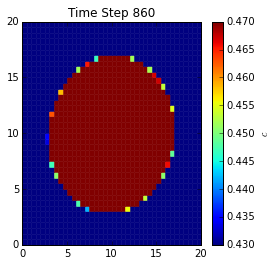

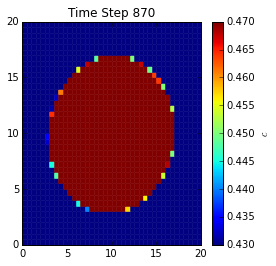

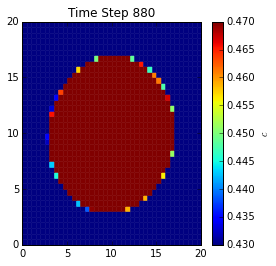

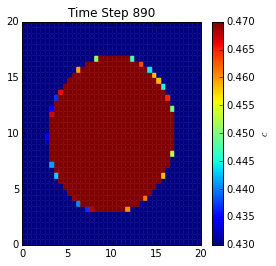

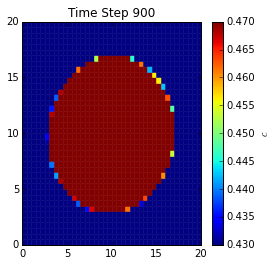

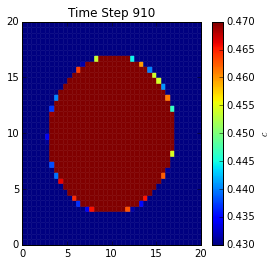

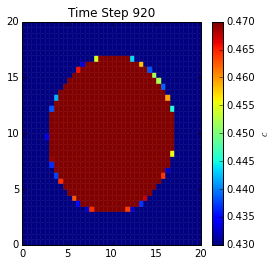

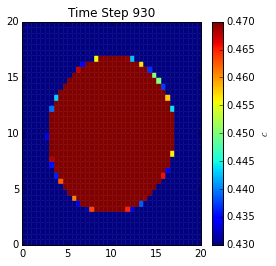

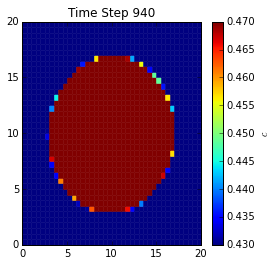

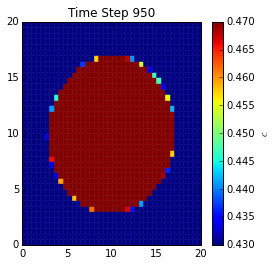

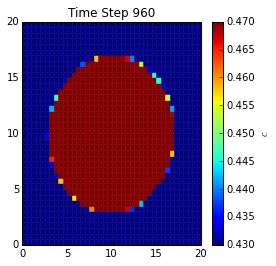

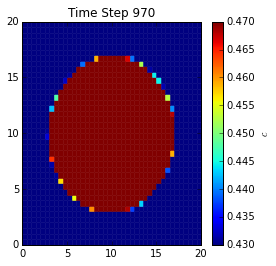

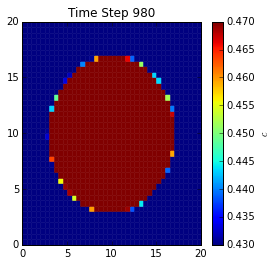

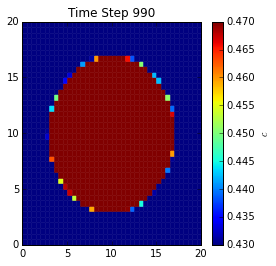

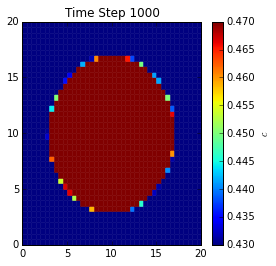

In [103]:
while steps < total_steps:
    res0 = eqn.sweep(c_var, dt=dt, solver=solver)
            
    for sweeps in range(total_sweeps):
        res = eqn.sweep(c_var, dt=dt, solver=solver)
        
#         print 'steps',steps
#         print 'res',res
#         print 'sweeps',sweeps
#         print 'dt',dt
        
    if res < res0 * tolerance:
        steps += 1
        elapsed += dt
        dt *= 1.1
        
# create 10 viewers to snapshot steps in the simulation
        if (steps%(total_steps/100)==0):
            print steps
            print elapsed
            # record the volume integral of the free energy 
            save_data(f_0_var(c_var).cellVolumeAverage*mesh.numberOfCells, elapsed)
            # pickle the data on c as a function of space at this particular time
            fp.dump.write({'time' : steps, 'var': c_var}, '{0}{1}{2}'.format("1a", steps, ".pkl"))
            # create a viewer based on the pickled data
            viewers.append(fp.Viewer((fp.dump.read('{0}{1}{2}'.format("1a", steps, ".pkl"))['var']),
                        limits = {'ymin': 0.0, 'ymax': 20.0},
                        datamin=.43, datamax =.47,
                        title = '{0}{1}'.format("Time Step ", steps)))
        
        c_var.updateOld()
    else:
        dt *= 0.8
        c_var[:] = c_var.old

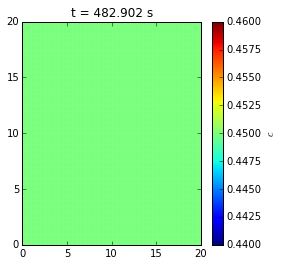

In [17]:
fp.MultiViewer(viewers).plot()

In [104]:
?fp.dump.write


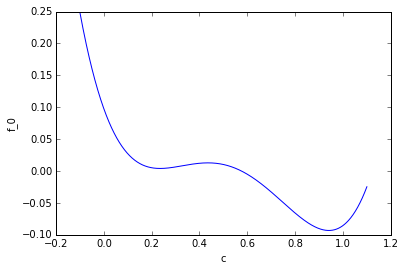

In [143]:
plotf_c()

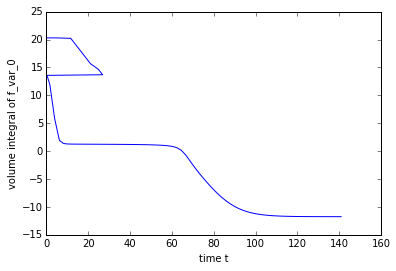

In [145]:
plt.figure(3)
plt.xlabel('time t')
plt.ylabel('volume integral of free energy')
plt.plot(time_data, f_data)
plt.show()